In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

In [3]:
df


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
df.shape

(3999, 12)

In [5]:
df= df.rename(columns={'ID#':'ID', 'Award?':'Award'})

In [6]:
df




,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [7]:
df1 =  df.drop(['Award'], axis=1)
df1.head(2)


,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,1,28143,0,1,1,1,174,1,0,0,7000
1,2,19244,0,1,1,1,215,2,0,0,6968


In [8]:
df1

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,1,28143,0,1,1,1,174,1,0,0,7000
1,2,19244,0,1,1,1,215,2,0,0,6968
2,3,41354,0,1,1,1,4123,4,0,0,7034
3,4,14776,0,1,1,1,500,1,0,0,6952
4,5,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403
3995,4018,64385,0,1,1,1,981,5,0,0,1395
3996,4019,73597,0,3,1,1,25447,8,0,0,1402
3997,4020,54899,0,1,1,1,500,1,500,1,1401


In [9]:
from sklearn.preprocessing import StandardScaler

std_df = StandardScaler().fit_transform(df1)      # this will used for kmeans
std_df.shape

(3999, 11)

In [10]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(df1)
minmax_df.shape

(3999, 11)

In [11]:
from sklearn.decomposition import PCA
pca_std = PCA(random_state=10, n_components=0.95)
pca_std_df= pca_std.fit_transform(std_df)

In [12]:

print(pca_std.singular_values_)

[113.43746277  87.47755504  78.60753251  63.93101711  62.41719384
  61.87091064  53.24657298  38.09981576]


In [13]:

print(pca_std.explained_variance_ratio_*100)

[29.2528995  17.39599135 14.04702123  9.29135681  8.85654615  8.70219733
  6.44524207  3.29990671]


In [14]:
# Cummulative variance ratio..

# this will give an idea of, at how many no. of PCAs, the cummulative addition of
#........variance will give much information..

cum_variance = np.cumsum(pca_std.explained_variance_ratio_*100)
cum_variance

array([29.2528995 , 46.64889085, 60.69591208, 69.98726889, 78.84381504,
       87.54601237, 93.99125444, 97.29116115])

In [15]:
# applying PCA on minmax_df

from sklearn.decomposition import PCA

pca_minmax =  PCA(random_state=10, n_components=0.95)
pca_minmax_df = pca_minmax.fit_transform(minmax_df)

In [16]:
# eigenvalues..

print(pca_minmax.singular_values_)

[25.97485228 20.40171361  6.74223322  4.7137069   4.35573784]


In [17]:
from sklearn.cluster import KMeans
# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model1 = KMeans(random_state=0,n_jobs=-1,)
model2 = KMeans(random_state=10, n_jobs=-1, max_iter=500, n_init=20,)



In [18]:
model1 = KMeans(n_clusters=6, random_state=0,n_jobs=-1)
y_predict1 = model1.fit_predict(pca_std_df)
y_predict1.shape

C:\Users\Rohit Chavan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


(3999,)

In [19]:

y_predict1
#clusterLabels

array([1, 1, 1, ..., 2, 2, 2])

In [20]:
model1.labels_
## y_predict & cluster labels both are same use any one of them to avoid further confusion.


array([1, 1, 1, ..., 2, 2, 2])

In [21]:
cluster_labels=pd.Series(model1.labels_)

In [22]:
df['clusters']=pd.DataFrame(cluster_labels,columns=['clusters'])

In [23]:
df

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


In [24]:
df2=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
#Using Agglomerative Clustering

In [25]:
df2

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [26]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [27]:
df_norm=norm_func(df2.iloc[:,:])

<AxesSubplot:>

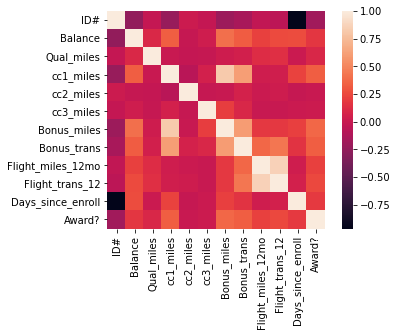

In [28]:
import seaborn as sns
cor = df_norm.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) 

(array([[3.970e+02, 3.980e+02, 4.010e+02, 3.980e+02, 4.000e+02, 4.020e+02,
         3.980e+02, 4.010e+02, 4.010e+02, 4.030e+02],
        [3.624e+03, 2.820e+02, 6.100e+01, 1.300e+01, 1.100e+01, 3.000e+00,
         2.000e+00, 2.000e+00, 0.000e+00, 1.000e+00],
        [3.844e+03, 5.400e+01, 4.700e+01, 1.600e+01, 1.600e+01, 7.000e+00,
         7.000e+00, 4.000e+00, 1.000e+00, 3.000e+00],
        [2.289e+03, 0.000e+00, 2.840e+02, 0.000e+00, 0.000e+00, 6.130e+02,
         0.000e+00, 5.250e+02, 0.000e+00, 2.880e+02],
        [3.956e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.800e+01,
         0.000e+00, 0.000e+00, 0.000e+00, 1.500e+01],
        [3.981e+03, 0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 4.000e+00,
         0.000e+00, 6.000e+00, 0.000e+00, 5.000e+00],
        [3.081e+03, 5.820e+02, 2.410e+02, 5.700e+01, 1.900e+01, 1.100e+01,
         0.000e+00, 3.000e+00, 3.000e+00, 2.000e+00],
        [1.660e+03, 1.478e+03, 5.490e+02, 2.110e+02, 6.100e+01, 2.900e+01,
         7.000e+00, 3.

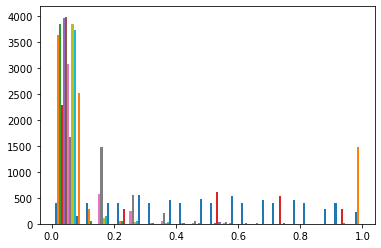

In [51]:
import matplotlib.pyplot as plt
plt.hist(df_norm)

In [29]:
df_norm

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.000000,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.000249,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.000498,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.000746,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.000995,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.999005,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.999254,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.999502,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.999751,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


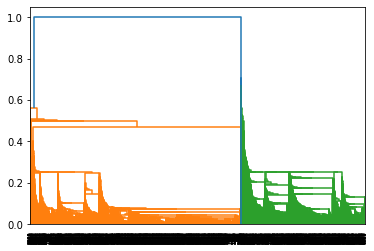

In [54]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='single'))

In [30]:
from sklearn.cluster import AgglomerativeClustering as ac
import scipy.cluster.hierarchy as sch

In [31]:
model=ac(n_clusters=4,affinity='euclidean',linkage='complete').fit(df_norm)

In [32]:
cluster_labels=pd.Series(model.labels_)

In [33]:
df2['clusters']=cluster_labels

In [34]:
df2

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [35]:
df3=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

In [36]:
df3


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [37]:
array=df3.values

In [38]:
array

array([[    1, 28143,     0, ...,     0,  7000,     0],
       [    2, 19244,     0, ...,     0,  6968,     0],
       [    3, 41354,     0, ...,     0,  7034,     0],
       ...,
       [ 4019, 73597,     0, ...,     0,  1402,     1],
       [ 4020, 54899,     0, ...,     1,  1401,     0],
       [ 4021,  3016,     0, ...,     0,  1398,     0]], dtype=int64)

In [39]:
from sklearn.preprocessing import StandardScaler 
std_scaler=StandardScaler().fit(array)
x=std_scaler.transform(array)

In [40]:
x

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [41]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=0.9,min_samples=6)
db.fit(x)


DBSCAN(eps=0.9, min_samples=6)

In [42]:
db.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [43]:
cl=db.labels_

In [44]:
cl

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [45]:
df3


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [46]:
cl=df3['cluster']=pd.DataFrame(cl,columns=['cluster'])

In [47]:
cl

,cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,1
3995,1
3996,1
3997,0


In [48]:
pd.concat([df3,cl],axis=1)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0,0


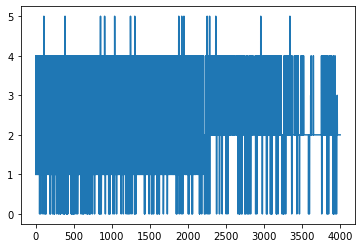

In [57]:
plt.plot(df['clusters'])

C:\Users\Rohit Chavan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='clusters', ylabel='Density'>

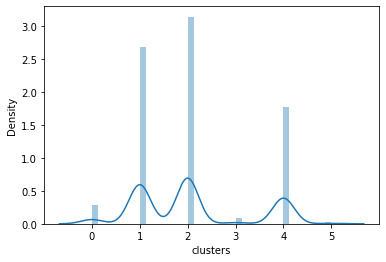

In [60]:
sns.distplot(df['clusters'])

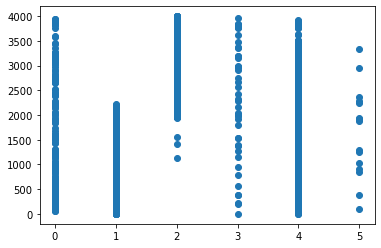

In [61]:
plt.scatter(x=df['clusters'],y=df.index)